# **Using Regression to predict Customer Spending Score**

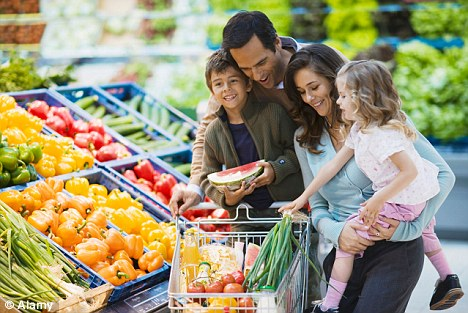

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [2]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# **Introduction**
Predicting customer spending score would enable a business to know which customers spend more in their businesses and therefore direct their marketing strategies towards maintaining these customers and also coming up with strategies on how to improve the sales to clients with the lowest spending. In this paper, I take you through a step by step process of making these predictions using linear regression, a machine learning algorithm used to forecast events and to make prediction. Moreover, linear regression can be used to tell the impact of a feature on a label. A feature refers to the input we used to make the predictions, whereas, a label is what we are predicting. In this case our features are Age and Annual Income and the label is Customer Spending Score. We want to predict customers' spending score based on his/her age and annual income.

The libraries I used are:
* Pandas
* Numpy
* Matplotlib
* Seaborn
* Scikitlearn

# Importing the dataset
Using pandas library we can import our csv file using the commands below;

In [28]:
data2=pd.read_csv("C:/Users/MUSA CHOKA/Desktop/F21/J21/Mall_Customers.csv")
print(data2)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


# Perform EDA and Data Cleaning
Exploratory data analysis (EDA) provide us with some basic insights about our dataset that forms the base for our prediction.

In [29]:
#Let's see the first six observations and check the number of variables and observations in the dataset
print(data2.head(n=6))
data2.shape[1],data2.shape[0]

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76


(5, 200)

In [31]:
# We would like to know the column names in our dataset, this is how we go about it
cols= data2.columns
print(cols)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [32]:
# The summary/descriptive statistics of all the variables in our dataset
print(data2.describe(include='all'))

        CustomerID  Gender         Age  Annual Income (k$)  \
count   200.000000     200  200.000000          200.000000   
unique         NaN       2         NaN                 NaN   
top            NaN  Female         NaN                 NaN   
freq           NaN     112         NaN                 NaN   
mean    100.500000     NaN   38.850000           60.560000   
std      57.879185     NaN   13.969007           26.264721   
min       1.000000     NaN   18.000000           15.000000   
25%      50.750000     NaN   28.750000           41.500000   
50%     100.500000     NaN   36.000000           61.500000   
75%     150.250000     NaN   49.000000           78.000000   
max     200.000000     NaN   70.000000          137.000000   

        Spending Score (1-100)  
count               200.000000  
unique                     NaN  
top                        NaN  
freq                       NaN  
mean                 50.200000  
std                  25.823522  
min                   1.

In [40]:
#Before performing analysis we would first need to clean our data,i.e remove the NA and NaN values, first we check if they exist
data2.isna()
#It's like our data is free of NA values, if they could exist we would use the below code to remove them
#Mall_Customers=data2.dropna(axis=0,inplace=True)
#print(Mall_Customers)

None


In [41]:
#Next, we can check on the variable data types
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB
None


In [42]:
#We may want to drop the Customer ID variable from our dataset since it is not relevant in the analysis process
Mall_Customers=data2.drop('CustomerID', axis=1)
print(Mall_Customers)

     Gender  Age  Annual Income (k$)  Spending Score (1-100)
0      Male   19                  15                      39
1      Male   21                  15                      81
2    Female   20                  16                       6
3    Female   23                  16                      77
4    Female   31                  17                      40
..      ...  ...                 ...                     ...
195  Female   35                 120                      79
196  Female   45                 126                      28
197    Male   32                 126                      74
198    Male   32                 137                      18
199    Male   30                 137                      83

[200 rows x 4 columns]


Now as you can see, the CustomerID column has been dropped, now we can find the new summary statistics and show data types for our new dataset with only the relevant variables in place.

In [43]:
print(Mall_Customers.describe())
print(Mall_Customers.info())

              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1

# Correlation Matrix and Heatmap 
Using correlation matrix and a heatmap ( pictorial aid) we can show the correlation between the variables/features in our dataset.

In [44]:
Corr_Matrix=round(Mall_Customers.corr(),2)  # Finds the correlation and rounding it to 2 decimal places
print(Corr_Matrix)

                         Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.00               -0.01                   -0.33
Annual Income (k$)     -0.01                1.00                    0.01
Spending Score (1-100) -0.33                0.01                    1.00


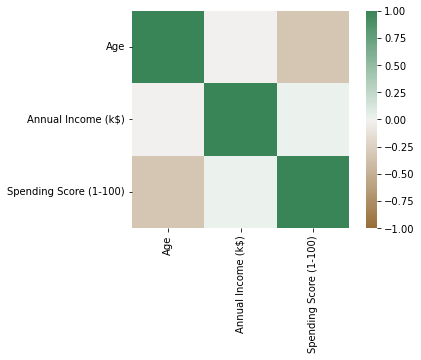

In [46]:
%matplotlib inline
xis_corr=sns.heatmap(Corr_Matrix,vmin=-1,vmax=1,center=0,
cmap=sns.diverging_palette(50,500,n=500),
square=True
)
plt.show()

* A correlation analysis is useful evaluating the relationship between variables, the association can either be a positive or a negative. Correlation values ranges from -1 to +1, a negative correlation value indicates an inverse relationship, i.e as one feature goes down the other one goes up on the other hand a positive correlation is where an increase in one variable leads to a relative increase in the other variable. Using the heatmap produced above the correlations can be seen, for instance,the correlation value for age and spending score is -0.25, most probably this would mean that as age increases the spending score decreases, there's no association between age and annual income as the correlation value is 0, also there is no correlation between Annual Income and Spending Score, there correlation value is obtained to be 0 as well.
* It is important to note that *correlation doesn't mean causation*
* Now we would like to find out the linear association between a customers spending score with their age and annual income and also to find the impact of these variables on Customers' spending score. We will use Regression Analysis to answer this question and to probably come up with the best predictive model that forecasts on customers' spending score based on the two features, i.e Age and Annual Income.

# Creating A Multiple Linear Regression Model
* Since we are to build a regression model on our dataset, we will have to split the dataset into a training set and test set. The model is build on the training set and we carry out prediction using the test set.
* So basically, the process involves three major steps after loading the dataset, i.e, splitting the data into training and test set, then building the model on the trained set, and finally making the predictions. We will move in that order.

In [83]:
# Splitting the dataset, first let's rename the variable spending score and annual income
from sklearn.model_selection import train_test_split
Mall_Customers.rename(columns = {"Spending Score (1-100)": "Spending_Score",
                     "Annual Income (k$)":"Annual_Income"},
                                 inplace = True)
y= Mall_Customers.Spending_Score
X= Mall_Customers[['Age','Annual_Income']]

# Now let's train the sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.head()
X_train.shape, y_test.shape

((160, 2), (40,))

In [87]:
# Now let's fit the model and make the predictions
from sklearn.linear_model import LinearRegression
regr= LinearRegression()
results=regr.fit(X_train,y_train)
attributes_coefficients = pd.DataFrame(regr.coef_, X.columns, columns=['Coefficient'])  
attributes_coefficients

,Coefficient
Age,-0.598670
Annual_Income,0.041801


According to this model
* An increase in age by 1 year reduced the customers' spending score by 0.60
* An increase in a customers' annual income resulted to an increase in the customers' spending score by 0.04

In [88]:
# Making predictions and compare these predictions with actual values
y_pred = regr.predict(X_test)

comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
comparison


,Actual,Predicted
178,14,40.268751
0,39,60.955075
81,55,51.210583
74,47,38.638510
51,60,53.702322
129,75,51.921201
132,34,59.745714
55,41,45.362741
176,15,40.658416
30,4,37.036615


Our model predicts some values nearly similar to the actual values and some are not near our values, the next step we will evaluate the accuracy of this model in performing prediction.

# Evaluating the Model Performance
Once we have trained our model, it is necessary to evaluate its performance. By so doing, we can be determine whether to use our model or not (basically build a new one by adding or removing features). Amongst the metrics used to evaluate the accuracy of a linear regression model are:
* Adjusted R-squared score (R^2/Coefficient of determination)
* Mean Squared Error
* Mean Absolute Error
* Root Mean Square Error

Scikit learn package can enable us calculate these metrics easily. However, it is still possible to carry out these metrics by writing Python code, i.e creating your own functions/calculations. I refer to use scikit learn in this study, machine learning is all about automation, therefore...:)

In [89]:
from sklearn import metrics 
print('Adjusted R-square:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Adjusted R-square: 0.061553285999681906
MAE: 19.923581238821935
MSE: 564.2317023255512
RMSE: 23.75356188712655


Let's use the Adjusted R-square to make our inference, the value of R-Square always lie between 0 and 1. From our model the adjusted R-square value is 0.06 (6%), this means that only 6% of customers' spending score is predicted by the age and annual income of the customer. We would be write if we conclude that the model is not a perfect fit to predicting a customers' spending score, one of the suggestions to improve the model would be to increase the features in our dataset.